In [ ]:
from tensorflow import keras
from keras.models import Model
import sklearn
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Activation, Flatten,Embedding,SimpleRNN, LSTM,Conv1D,MaxPooling1D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Model
from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.metrics import roc_curve
from keras.applications import VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Problem 1: AutoEncoder

In [ ]:
# Data Loading
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model = Sequential()
## Encoding Part
model.add(Conv2D(16, (3, 3), activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))

## Decoding Part
model.add(Conv2D(8, (3, 3), activation='relu',padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu',padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid',padding='same'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        1168      
__________

In [ ]:
# Training
from keras.callbacks import TensorBoard
model.compile(optimizer='adadelta', loss='binary_crossentropy')
history = model.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 70s 1ms/step - loss: 0.3392 - val_loss: 0.3005
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2940 - val_loss: 0.2919
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2862 - val_loss: 0.2854
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2819 - val_loss: 0.2823
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2792 - val_loss: 0.2814
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2766 - val_loss: 0.2779
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2753 - val_loss: 0.2753
Epoch 8/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2742 - val_loss: 0.2750
Epoch 9/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2733 - val_loss: 0.2752
Epoch

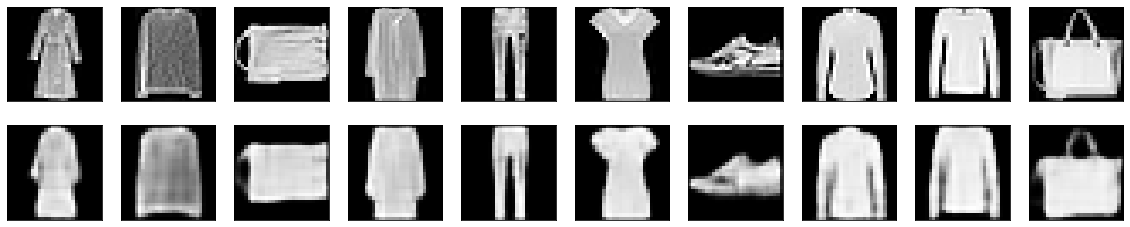

In [ ]:
# Plotting the Model results.
import matplotlib.pyplot as plt
import random
decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    x=random.randrange(0,10000)
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[x].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[x].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Problem 2: Image Classification
### 2.1 Deep CNN

For the image classification, i used three Convolutional layers with kernel isze of 3*3, strides 1*1, two max polling layers to downsample, followed by two dense layers to output.  

The model achived descent results in classifying the images.For training sets, the accuracy is 88.45% and for test sets, the accuracy is 88.94%. 

In [ ]:
# Data Loading
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3, 3), activation='relu', strides=(1, 1),  input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 32,kernel_size=(3, 3),activation='relu', strides=(1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='Adam',metrics=["acc"])

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size = 128,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3042 - acc: 0.8884 - val_loss: 0.2841 - val_acc: 0.8959
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2964 - acc: 0.8908 - val_loss: 0.2946 - val_acc: 0.8953
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2949 - acc: 0.8920 - val_loss: 0.2760 - val_acc: 0.9011
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2902 - acc: 0.8935 - val_loss: 0.2825 - val_acc: 0.8976
Epoch 5/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2877 - acc: 0.8936 - val_loss: 0.2775 - val_acc: 0.8999
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2812 - acc: 0.8961 - val_loss: 0.2722 - val_acc: 0.8996
Epoch 7/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2777 - acc: 0.8989 - val_loss: 0.2675 - val_acc

### 2.2 transfer learning


I am using RestNet50 for Transfer Learning. The training data accuracy is 0.8917 and test data accuracy is 0.8925

In [ ]:
## convert gray scale image to rgv
def to_rgb(img):
    img= K.expand_dims(img, axis=-1)
    tiling = [1] * 4    
    tiling[-1] *= 3
    img= K.tile(img, tiling)
    return img
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
x_train = to_rgb(X_train)
x_train = tf.image.resize(x_train, [32, 32])
x_test = to_rgb(X_test)
x_test = tf.image.resize(x_test, [32, 32])
sess = tf.Session()
x_train = sess.run(x_train)
x_test= sess.run(x_test)

In [ ]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))
conv_base.trainable = False
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10, activation="sigmoid"))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                650       
Total params: 14,887,818
Trainable params: 173,130
Non-trainable params: 14,714,688
__________________________________________________________

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='Adam',metrics=["acc"])
model.fit(x_train, Y_train, epochs=6, validation_data=(x_test, Y_test), verbose=True, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 27s 449us/step - loss: 0.8970 - acc: 0.5647 - val_loss: 0.5334 - val_acc: 0.8085
Epoch 2/6
60000/60000 [==============================] - 22s 362us/step - loss: 0.4305 - acc: 0.8420 - val_loss: 0.4443 - val_acc: 0.8381
Epoch 3/6
60000/60000 [==============================] - 22s 364us/step - loss: 0.3678 - acc: 0.8627 - val_loss: 0.4297 - val_acc: 0.8465
Epoch 4/6
60000/60000 [==============================] - 22s 364us/step - loss: 0.3297 - acc: 0.8748 - val_loss: 0.4473 - val_acc: 0.8488
Epoch 5/6
60000/60000 [==============================] - 22s 362us/step - loss: 0.3044 - acc: 0.8831 - val_loss: 0.4344 - val_acc: 0.8500
Epoch 6/6
60000/60000 [==============================] - 22s 363us/step - loss: 0.2815 - acc: 0.8917 - val_loss: 0.4528 - val_acc: 0.8529


## Problem 3 Text Classification¶


### 3.1 RNN


In [ ]:
import pandas as pd
import collections
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import pandas as pd
import collections
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

filepath = 'tweets_with_labels.csv'
dic = collections.defaultdict(list)
with open(filepath) as fp:
    title = fp.readline()
    title = title.split()
    line = fp.readline()
    line = line[1:len(line)-1]
    while line:
        line = line.split()
        for i in range(len(line)-1,len(line)-16,-1):
            num = line[i]
            if num.isnumeric():
                dic[len(line)-i-1].append(float(num))
            else:
                dic[len(line)-i-1].append(float(num[:-1]))
        dic['tweet'].append(' '.join(line[1:len(line)-15]))
        line = fp.readline()

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.DataFrame(dic)
data.columns=['k1','k2','k3','k4','k5','k6','k7','k8','k9','k10','k11','k12','k13','k14','k15','tweets']
data.head(15)

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,tweets
0,0.00,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,for a Rainy Afternoon: {link}
1,0.00,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,RT: @mention: I love rainy days.
2,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.00,0.0,0.00,0.00,0.00,0.0,0.0,Good Morning Chicago! Time to kick the Windy C...
3,0.00,0.0,0.2,0.0,0.0,0.00,0.19,0.0,0.60,0.0,0.00,0.00,0.00,0.0,0.0,Preach lol! :) RT @mention: #alliwantis this t...
4,0.00,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,@mention good morning sunshine
5,0.00,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,Rather be storm chasing.
6,0.57,0.0,0.0,0.0,0.0,0.00,0.17,0.0,0.42,0.0,0.37,0.00,0.17,0.2,0.0,#WEATHER: 1:54 pm : 61.0F. Feels 60F. 29.98% H...
7,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,1.00,0.00,0.0,0.0,Father. Son. Holy ghost. Amen... hope I come o...
8,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.60,0.0,0.00,0.19,0.00,0.0,0.0,Mild Monday best weather day of the week in Ok...
9,0.00,0.0,0.0,0.0,1.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,"With the snow forecast for Tahoe this weekend,..."


In [ ]:
import string
import re

def clean_tweets(tweet):
    stop_words = set(stopwords.words('english')+ ['rt', 'via',"''","'s","n't","'m",'``','day','like'])
    punctuation = list(string.punctuation) + ['…', '...','’','''''',]
    tweet=re.sub(r'@[a-zA-Z0-9_]* ', ' @tags ',tweet)
    tweet = re.sub('#', '',tweet)
    tweet = re.sub(r'[-\.\n]', '',tweet)
    tweet = re.sub(r'&\w+;','',tweet)
    # Removing links
    tweet = re.sub(r'https?://\S*', '',tweet)
    tweet = tweet.replace('[^\w\s]','')
    word_tokens = word_tokenize(tweet)
    filtered_tweet=[]
    #looping through conditions
    for w in word_tokens:
        if   w not in punctuation and w not in stop_words:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

In [ ]:
data['cleaned']=data['tweets'].apply(clean_tweets)

In [ ]:
data.head(10)

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,tweets,cleaned
0,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,for a Rainy Afternoon: {link},rainy afternoon link
1,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,RT: @mention: I love rainy days.,rt mention i love rainy days
2,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.00,0.0,0.00,0.00,0.00,0.0,0.0,Good Morning Chicago! Time to kick the Windy C...,good morning chicago time kick windy city nuts...
3,0.00,0.0,0.2,0.0,0.0,0.0,0.19,0.0,0.60,0.0,0.00,0.00,0.00,0.0,0.0,Preach lol! :) RT @mention: #alliwantis this t...,preach lol rt mention alliwantis type weather ...
4,0.00,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,@mention good morning sunshine,tags good morning sunshine
5,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,Rather be storm chasing.,rather storm chasing
6,0.57,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.42,0.0,0.37,0.00,0.17,0.2,0.0,#WEATHER: 1:54 pm : 61.0F. Feels 60F. 29.98% H...,weather 1:54 pm 610f feels 60f 2998 humidity 6...
7,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.00,0.0,0.0,Father. Son. Holy ghost. Amen... hope I come o...,father son holy ghost amen hope i come alive h...
8,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.60,0.0,0.00,0.19,0.00,0.0,0.0,Mild Monday best weather day of the week in Ok...,mild monday best weather week oklahoma link okwx
9,0.00,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,"With the snow forecast for Tahoe this weekend,...",with snow forecast tahoe weekend maybe tags ri...


In [ ]:
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(data.cleaned)
sequences = tokenizer.texts_to_sequences(data.cleaned)
x = pad_sequences(sequences, maxlen=180)

In [ ]:
y=data[['k1','k2','k3','k4','k5','k6','k7','k8','k9','k10','k11','k12','k13','k14','k15']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

In [ ]:
from keras.layers import Dense, Embedding, LSTM,GRU
model_lstm=Sequential()
model_lstm.add(Embedding(1500, 180))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(15,activation='softmax'))
model_lstm.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 180)         270000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                62720     
_________________________________________________________________
dense_44 (Dense)             (None, 15)                975       
Total params: 333,695
Trainable params: 333,695
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = model.fit(x_train, y_train,epochs = 5, batch_size = 128, validation_split = 0.2,verbose=1)

Train on 49884 samples, validate on 12472 samples
Epoch 1/5
49884/49884 [==============================] - 122s 2ms/step - loss: 0.1079 - acc: 0.9112 - val_loss: 0.1053 - val_acc: 0.9126
Epoch 2/5
49884/49884 [==============================] - 115s 2ms/step - loss: 0.1024 - acc: 0.9119 - val_loss: 0.1034 - val_acc: 0.9129
Epoch 3/5
49884/49884 [==============================] - 115s 2ms/step - loss: 0.1000 - acc: 0.9121 - val_loss: 0.1026 - val_acc: 0.9129
Epoch 4/5
49884/49884 [==============================] - 115s 2ms/step - loss: 0.0984 - acc: 0.9124 - val_loss: 0.1022 - val_acc: 0.9123
Epoch 5/5
49884/49884 [==============================] - 115s 2ms/step - loss: 0.0972 - acc: 0.9126 - val_loss: 0.1011 - val_acc: 0.9128


In [ ]:
model.evaluate(x_test, y_test)

15590/15590 [==============================] - 32s 2ms/step


[0.1004794979918416, 0.9121402627845235]

Training accuracy is 91.26% and test accuracy is 91.21%

### 3.2 CNN

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(10000, input_length = 180, output_dim = 128))
model_cnn.add(Conv1D(128, 3,activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv1D(64, 3, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv1D(32, 5, activation='relu'))
model_cnn.add(Flatten())   
model_cnn.add(Dense(256, activation ='relu'))
model_cnn.add(Dense(15, activation ='sigmoid'))
model_cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['acc'])
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 180, 128)          1280000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 178, 128)          49280     
_________________________________________________________________
dropout_4 (Dropout)          (None, 178, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 176, 64)           24640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 176, 64)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 172, 32)           10272     
_________________________________________________________________
flatten_11 (Flatten)         (None, 5504)              0         
__________

In [ ]:
history_cnn = model_cnn.fit(x_train, y_train,epochs = 5, batch_size = 128, validation_split = 0.2,verbose=1)

Train on 49884 samples, validate on 12472 samples
Epoch 1/5
49884/49884 [==============================] - 19s 388us/step - loss: 0.1819 - acc: 0.8912 - val_loss: 0.1314 - val_acc: 0.9077
Epoch 2/5
49884/49884 [==============================] - 11s 223us/step - loss: 0.1198 - acc: 0.9096 - val_loss: 0.1096 - val_acc: 0.9137
Epoch 3/5
49884/49884 [==============================] - 11s 225us/step - loss: 0.1059 - acc: 0.9132 - val_loss: 0.1027 - val_acc: 0.9148
Epoch 4/5
49884/49884 [==============================] - 11s 227us/step - loss: 0.0992 - acc: 0.9146 - val_loss: 0.1013 - val_acc: 0.9150
Epoch 5/5
49884/49884 [==============================] - 11s 229us/step - loss: 0.0945 - acc: 0.9156 - val_loss: 0.0999 - val_acc: 0.9154


In [ ]:
model_cnn.evaluate(x_test, y_test)

15590/15590 [==============================] - 3s 172us/step


[0.09953961481051693, 0.9146461408439548]

Training accuracy is 91.56% and test accuracy is 91.54%

### 3.3 LSTM v.s CNN
For LSTM model, Training accuracy is 91.26% and test accuracy is 91.21%.  
For CNN model,Training accuracy is 91.56% and test accuracy is 91.54%

The two models are generally comparable, one model will outperform the other one on certain classes. For example, LSTM model is much better in predicting class 12(K13). 

In [ ]:
y_test_actual=[np.argmax(np.array(y_test.iloc[i])) for i in range(len(y_test))]

In [ ]:
y_predicted_rnn=model.predict_classes(x_test)
y_predicted_cnn=model_cnn.predict_classes(x_test)

In [ ]:
lb = sklearn.preprocessing.LabelBinarizer()
lb.fit(y_test_actual)
y_test = lb.transform(y_test_actual)
y_pred_rnn = lb.transform(y_predicted_rnn)
y_pred_cnn = lb.transform(y_predicted_cnn)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_rnn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
for i in range(15):
    fpr1[i], tpr1[i], _ = roc_curve(y_test[:, i], y_pred_cnn[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

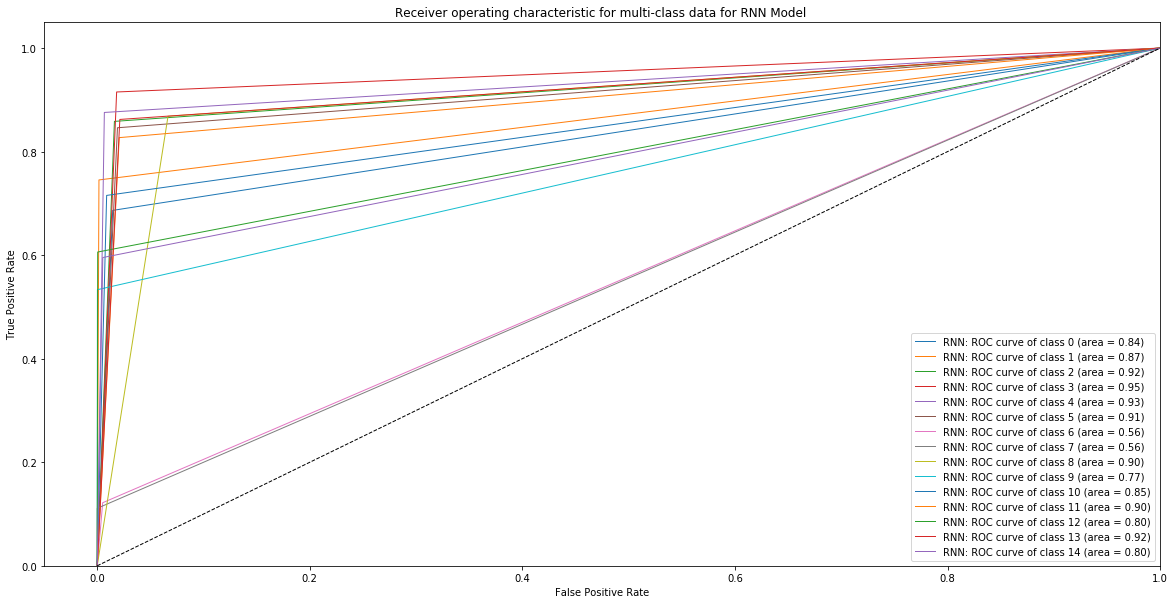

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
for i in range(15):
    plt.plot(fpr[i], tpr[i], lw=1,
             label='RNN: ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data for RNN Model ')
plt.legend(loc="lower right")
plt.show()

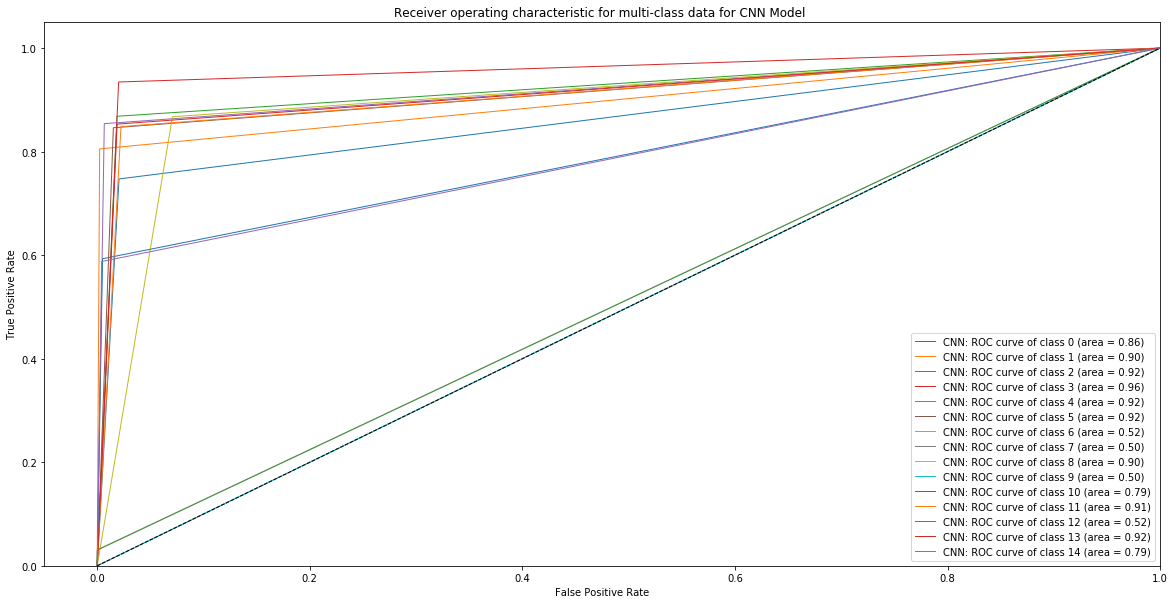

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
for i in range(15):
    plt.plot(fpr1[i], tpr1[i], lw=1,
             label='CNN: ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc1[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data for CNN Model ')
plt.legend(loc="lower right")
plt.show()

Pytorch


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
import numpy as np

dataiter = iter(trainloader)
images, labels = dataiter.next()

for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.226
[1,  4000] loss: 1.855
[1,  6000] loss: 1.669
[1,  8000] loss: 1.567
[1, 10000] loss: 1.514
[1, 12000] loss: 1.448
[2,  2000] loss: 1.387
[2,  4000] loss: 1.362
[2,  6000] loss: 1.329
[2,  8000] loss: 1.303
[2, 10000] loss: 1.277
[2, 12000] loss: 1.279
Finished Training
